<h1 align=center> Diabates Prediction </h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
data = pd.read_csv('./Diabetes Classification.csv')
data.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [3]:
data.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


In [5]:
le = LabelEncoder()

In [6]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])

In [7]:
data

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,2,100,5.7,0,0,0,1,0
1,55,0,30,0,120,6.4,1,1,1,0,1
2,65,1,35,0,140,7.1,1,1,1,0,1
3,75,0,40,0,160,7.8,1,1,1,0,1
4,40,1,20,2,80,5.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
123,17,0,15,2,100,5.7,0,1,1,0,1
124,22,1,19,2,120,6.4,0,1,1,0,1
125,27,0,24,0,140,7.1,0,1,1,0,1
126,32,1,29,0,160,7.8,0,1,1,0,1


In [8]:
x = data.iloc[:,:-1].values

In [9]:
y = data.iloc[:,-1].values

In [10]:
sc = StandardScaler()

In [11]:
x = sc.fit_transform(x)

In [12]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [13]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    print("mean score:",np.mean(scores)*100)
    print("*"*100)

cross validation model:LogisticRegression
mean score: 97.69230769230771
****************************************************************************************************
cross validation model:DecisionTreeClassifier
mean score: 96.92307692307693
****************************************************************************************************
cross validation model:RandomForestClassifier
mean score: 97.69230769230771
****************************************************************************************************
cross validation model:AdaBoostClassifier
mean score: 97.69230769230771
****************************************************************************************************
cross validation model:GradientBoostingClassifier
mean score: 97.69230769230771
****************************************************************************************************
cross validation model:KNeighborsClassifier
mean score: 97.69230769230771
*********************************************

 selecting randomforestclassifier

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
model = RandomForestClassifier()

In [16]:
model.fit(x_train,y_train)
print("Model terained with RandomForestClassifier")
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("confusion_matrix train is:",con_train)
print("Confusion_matrix test is",con_test)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model terained with RandomForestClassifier
Model accuracy on train is: 1.0
Model accuracy on test is : 0.9615384615384616
confusion_matrix train is: [[78  0]
 [ 0 24]]
Confusion_matrix test is [[19  0]
 [ 1  6]]
wrong predictions made: (1, '/', 26)


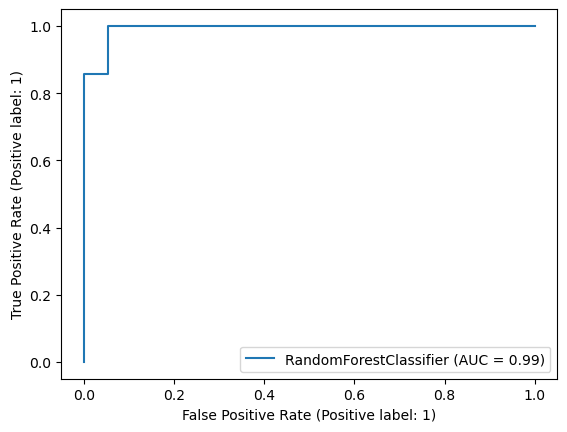

In [17]:
roc_display = RocCurveDisplay.from_estimator(model,x_test,y_test)